In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict

In [6]:
from sklearn.preprocessing import OrdinalEncoder

In [7]:
df_test= pd.read_csv(r'C:\Users\Smelly_Giraffe\Documents\DataWorks\Titanic\DataSource\test.csv')
df_train= pd.read_csv(r'C:\Users\Smelly_Giraffe\Documents\DataWorks\Titanic\DataSource\train.csv')
df_gender= pd.read_csv(r'C:\Users\Smelly_Giraffe\Documents\DataWorks\Titanic\DataSource\gender_submission.csv')

In [8]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
df_train['Age'].value_counts()
df_train['Age'].isna().sum()

177

# Tranforming the categorial variables of "Sex"

In [11]:
conditionSex = df_train['Sex'] == "male"
df_train.loc[conditionSex, 'Sex'] = 1
conditionSex = df_train['Sex'] == "female"
df_train.loc[conditionSex, 'Sex'] = 0

# otr just use df_train['Sex'] = df_train['Sex'].map({'male': 0, 'female': 1}).astype(int)

In [12]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


# Now for "Embarked"

In [59]:
# df_train['Embarked'].value_counts()
# df_train['Embarked'].isna().sum()
df_train['Embarked'] = df_train['Embarked'].fillna('OtherPort')

In [60]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
embarked_hot_cat = cat_encoder.fit_transform(df_train[['Embarked']])
df_embarked_hot_cat = pd.DataFrame(embarked_hot_cat.toarray())
# df_train = df_train.join(df_embarked_hot_cat)

cat_encoder.categories_
df_embarked_hot_cat


,0,1,2,3
0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
886,0.0,0.0,0.0,1.0
887,0.0,0.0,0.0,1.0
888,0.0,0.0,0.0,1.0
889,1.0,0.0,0.0,0.0


In [61]:
cat_encoder.categories_

[array(['C', 'OtherPort', 'Q', 'S'], dtype=object)]

In [62]:
df_embarked_hot_cat.columns = ['C', 'OtherPort', 'Q', 'S']

In [63]:
df_embarked_hot_cat

,C,OtherPort,Q,S
0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
886,0.0,0.0,0.0,1.0
887,0.0,0.0,0.0,1.0
888,0.0,0.0,0.0,1.0
889,1.0,0.0,0.0,0.0


In [64]:
df_train = df_train.join(df_embarked_hot_cat)
df_train = df_train.drop(['Embarked'], axis = 1)

In [65]:
df_train

,Age,Cabin,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,C,OtherPort,Q,S
0,22.0,NaN,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0,A/5 21171,0.0,0.0,0.0,1.0
1,38.0,C85,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1,PC 17599,1.0,0.0,0.0,0.0
2,26.0,NaN,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1,STON/O2. 3101282,0.0,0.0,0.0,1.0
3,35.0,C123,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1,113803,0.0,0.0,0.0,1.0
4,35.0,NaN,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0,373450,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,NaN,13.0000,"Montvila, Rev. Juozas",0,887,2,1,0,0,211536,0.0,0.0,0.0,1.0
887,19.0,B42,30.0000,"Graham, Miss. Margaret Edith",0,888,1,0,0,1,112053,0.0,0.0,0.0,1.0
888,24.0,NaN,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",2,889,3,0,1,0,W./C. 6607,0.0,0.0,0.0,1.0
889,26.0,C148,30.0000,"Behr, Mr. Karl Howell",0,890,1,1,0,1,111369,1.0,0.0,0.0,0.0


# Checking and tranforming the categorial variables of "Cabin"

In [66]:
df_train['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [67]:
df_train['Cabin'].isna().sum()

687

In [68]:
df_cabin_class = df_train[['Cabin']].copy()

In [69]:
df_cabin_class

,Cabin
0,NaN
1,C85
2,NaN
3,C123
4,NaN
...,...
886,NaN
887,B42
888,NaN
889,C148


In [70]:
df_cabin_class = df_cabin_class.fillna('Other')

In [71]:
conditionT = df_cabin_class['Cabin'].str.startswith('T')
df_cabin_class.loc[conditionT, 'Cabin'] = 'T'

conditionG = df_cabin_class['Cabin'].str.startswith('G')
df_cabin_class.loc[conditionG, 'Cabin'] = 'G'

conditionF = df_cabin_class['Cabin'].str.startswith('F')
df_cabin_class.loc[conditionF, 'Cabin'] = 'F'

conditionE = df_cabin_class['Cabin'].str.startswith('E')
df_cabin_class.loc[conditionE, 'Cabin'] = 'E'

conditionD = df_cabin_class['Cabin'].str.startswith('D')
df_cabin_class.loc[conditionD, 'Cabin'] = 'D'

conditionC = df_cabin_class['Cabin'].str.startswith('C')
df_cabin_class.loc[conditionC, 'Cabin'] = 'C'

conditionB = df_cabin_class['Cabin'].str.startswith('B')
df_cabin_class.loc[conditionB, 'Cabin'] = 'B'

conditionA = df_cabin_class['Cabin'].str.startswith('A')
df_cabin_class.loc[conditionA, 'Cabin'] = 'A'

# or just use map as in 'Sex' upstream

In [72]:
ordinal_encoder = OrdinalEncoder()
df_cabin_class_encoded = ordinal_encoder.fit_transform(df_cabin_class)
ordinal_encoder.categories_

[array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'Other', 'T'], dtype=object)]

In [73]:
df_cabin_class_encoded = df_cabin_class_encoded.astype(int)
df_cabin_class['CabinEncoded']=pd.Series(df_cabin_class_encoded[:,0])

In [74]:
df_cabin_class.value_counts()

Cabin  CabinEncoded
Other  7               687
C      2                59
B      1                47
D      3                33
E      4                32
A      0                15
F      5                13
G      6                 4
T      8                 1
dtype: int64

In [75]:
####################################### Adding df_cabin_class back to the traiing set ############
df_cabin_class = df_cabin_class.rename({"Cabin": "CabinClass"}, axis=1)
df_train = pd.concat([df_train, df_cabin_class],axis=1)


# Checks

In [76]:
# check for the sex dependencies  # 0-women \ 1-men

<AxesSubplot: xlabel='Sex'>

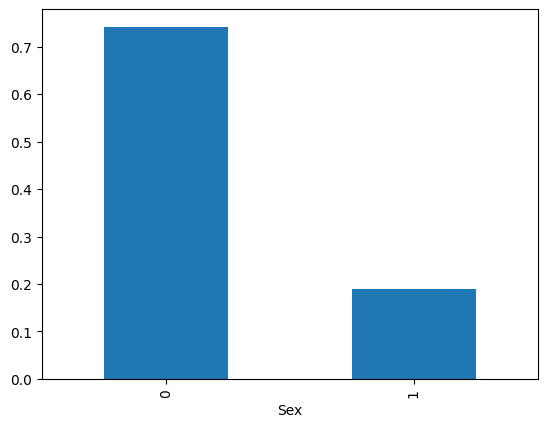

In [77]:
df_train.groupby('Sex').Survived.mean().plot(kind='bar')

In [78]:
df_train

,Age,Cabin,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,C,OtherPort,Q,S,CabinClass,CabinEncoded
0,22.0,NaN,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0,A/5 21171,0.0,0.0,0.0,1.0,Other,7
1,38.0,C85,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1,PC 17599,1.0,0.0,0.0,0.0,C,2
2,26.0,NaN,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1,STON/O2. 3101282,0.0,0.0,0.0,1.0,Other,7
3,35.0,C123,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1,113803,0.0,0.0,0.0,1.0,C,2
4,35.0,NaN,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0,373450,0.0,0.0,0.0,1.0,Other,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,NaN,13.0000,"Montvila, Rev. Juozas",0,887,2,1,0,0,211536,0.0,0.0,0.0,1.0,Other,7
887,19.0,B42,30.0000,"Graham, Miss. Margaret Edith",0,888,1,0,0,1,112053,0.0,0.0,0.0,1.0,B,1
888,24.0,NaN,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",2,889,3,0,1,0,W./C. 6607,0.0,0.0,0.0,1.0,Other,7
889,26.0,C148,30.0000,"Behr, Mr. Karl Howell",0,890,1,1,0,1,111369,1.0,0.0,0.0,0.0,C,2


In [16]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<AxesSubplot: title={'center': 'PassengerId'}>,
        <AxesSubplot: title={'center': 'Survived'}>,
        <AxesSubplot: title={'center': 'Pclass'}>],
       [<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'SibSp'}>,
        <AxesSubplot: title={'center': 'Parch'}>],
       [<AxesSubplot: title={'center': 'Fare'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

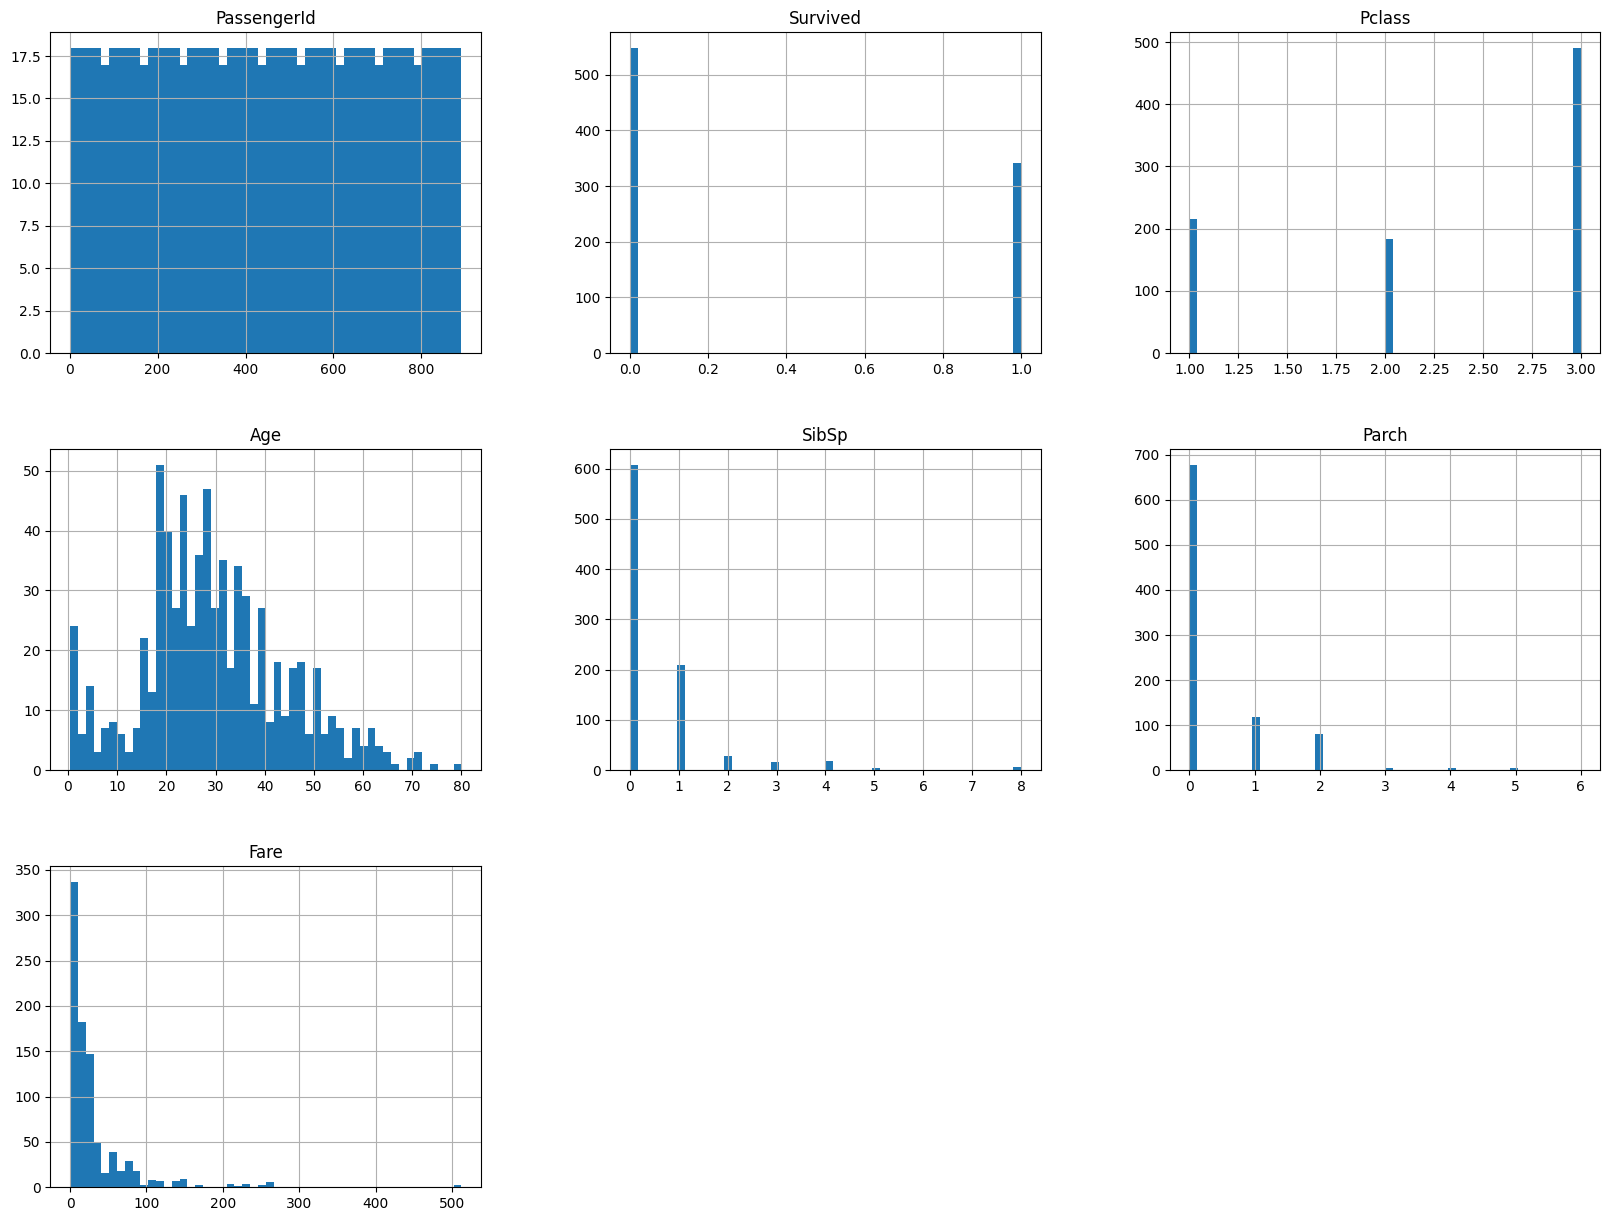

In [17]:
################ Some histograms ###############
df_train.hist(bins=50, figsize=(20,15))

In [30]:
########## On lookout for correlations #########
corr_matrix = df_train.corr(method='pearson', numeric_only='float')
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,OtherPort,Q,S,CabinEncoded
PassengerId,1.000000e+00,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.001205,-6.756184e-19,-0.033606,0.022148,-0.033080
Survived,-5.006661e-03,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.168240,6.009485e-02,0.003650,-0.155660,-0.295113
Pclass,-3.514399e-02,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.243292,-7.428233e-02,0.221009,0.081720,0.742093
Age,3.684720e-02,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.036261,7.411965e-02,-0.022405,-0.032523,-0.267161
SibSp,-5.752683e-02,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.059528,-2.250825e-02,-0.026354,0.070941,0.041058
Parch,-1.652012e-03,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.011069,-2.246691e-02,-0.081228,0.063036,-0.031553
Fare,1.265822e-02,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.269335,4.564557e-02,-0.117216,-0.166603,-0.525742
C,-1.204795e-03,0.168240,-0.243292,0.036261,-0.059528,-0.011069,0.269335,1.000000,-2.286386e-02,-0.148258,-0.778359,-0.247717
OtherPort,-6.756184e-19,0.060095,-0.074282,0.074120,-0.022508,-0.022467,0.045646,-0.022864,1.000000e+00,-0.014588,-0.076588,-0.113818
Q,-3.360570e-02,0.003650,0.221009,-0.022405,-0.026354,-0.081228,-0.117216,-0.148258,-1.458805e-02,1.000000,-0.496624,0.128186


array([[<AxesSubplot: xlabel='Survived', ylabel='Survived'>,
        <AxesSubplot: xlabel='Pclass', ylabel='Survived'>,
        <AxesSubplot: xlabel='Fare', ylabel='Survived'>,
        <AxesSubplot: xlabel='CabinEncoded', ylabel='Survived'>],
       [<AxesSubplot: xlabel='Survived', ylabel='Pclass'>,
        <AxesSubplot: xlabel='Pclass', ylabel='Pclass'>,
        <AxesSubplot: xlabel='Fare', ylabel='Pclass'>,
        <AxesSubplot: xlabel='CabinEncoded', ylabel='Pclass'>],
       [<AxesSubplot: xlabel='Survived', ylabel='Fare'>,
        <AxesSubplot: xlabel='Pclass', ylabel='Fare'>,
        <AxesSubplot: xlabel='Fare', ylabel='Fare'>,
        <AxesSubplot: xlabel='CabinEncoded', ylabel='Fare'>],
       [<AxesSubplot: xlabel='Survived', ylabel='CabinEncoded'>,
        <AxesSubplot: xlabel='Pclass', ylabel='CabinEncoded'>,
        <AxesSubplot: xlabel='Fare', ylabel='CabinEncoded'>,
        <AxesSubplot: xlabel='CabinEncoded', ylabel='CabinEncoded'>]],
      dtype=object)

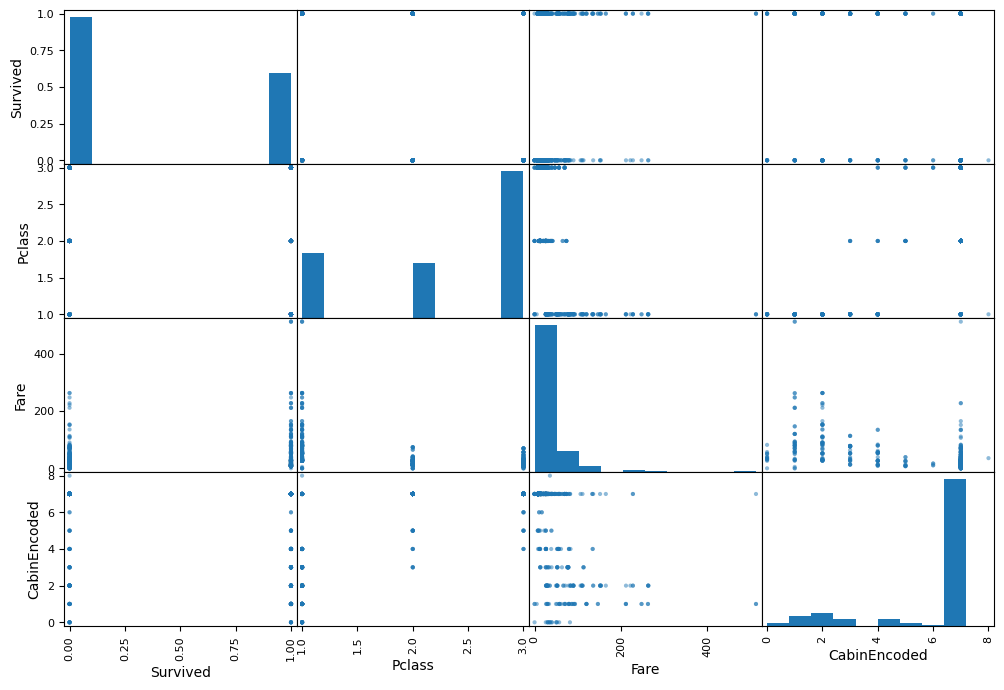

In [79]:
########## Plot thy plots #########
from pandas.plotting import scatter_matrix

attributes = ["Survived", "Pclass", "Fare", "CabinEncoded"]
scatter_matrix(df_train[attributes], figsize=(12, 8))

# OK so its a classification problem

In [10]:
from sklearn.svm import SVR

In [33]:
####### Remove the clunk and take out the labels ###

df_train_labels = df_train[['Survived']]

df_train_slimmed_no_age = df_train.drop(['Age','Name','Ticket',"Cabin", 'Survived','CabinClass'], axis = 1)

############## Make a 'df_train_slimmed_age_imputed' array #################

In [34]:
df_train_slimmed_no_age

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,C,OtherPort,Q,S,CabinEncoded
0,1,3,1,1,0,7.2500,0.0,0.0,0.0,1.0,7
1,2,1,0,1,0,71.2833,1.0,0.0,0.0,0.0,2
2,3,3,0,0,0,7.9250,0.0,0.0,0.0,1.0,7
3,4,1,0,1,0,53.1000,0.0,0.0,0.0,1.0,2
4,5,3,1,0,0,8.0500,0.0,0.0,0.0,1.0,7
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,1,0,0,13.0000,0.0,0.0,0.0,1.0,7
887,888,1,0,0,0,30.0000,0.0,0.0,0.0,1.0,1
888,889,3,0,1,2,23.4500,0.0,0.0,0.0,1.0,7
889,890,1,1,0,0,30.0000,1.0,0.0,0.0,0.0,2


In [35]:
svr_m = SVR(kernel = 'linear', C = 0.5, gamma = 1)

In [36]:
svr_m.fit(df_train_slimmed_no_age, df_train_labels)

C:\Users\Smelly_Giraffe\.conda\envs\DataWorksEnv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=0.5, gamma=1, kernel='linear')

In [40]:
svr_predictions = svr_m.predict(df_train_slimmed_no_age)

In [57]:
# cross_val_score(svr_m, df_train_slimmed_no_age, df_train_labels, cv=3, scoring="accuracy")

In [47]:
df_train_labels = df_train_labels.squeeze()

In [58]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(df_train_slimmed_no_age, df_train_labels)

SGDClassifier(random_state=42)

In [59]:
sgd_clf.fit(df_train_slimmed_no_age, df_train_labels)

SGDClassifier(random_state=42)

In [63]:
# sgd_clf.predict([0])

In [61]:
cross_val_score(sgd_clf, df_train_slimmed_no_age, df_train_labels, cv=3, scoring="accuracy")

array([0.52525253, 0.62289562, 0.61616162])

# Some serious SVR handling

In [18]:
from sklearn.svm import SVC

In [19]:
# Rounding the Age
df_train['Age'] = df_train.Age.round()

In [20]:
# Separating the data to predict the missing ages
X_train = df_train[df_train.Age.notnull()][['Pclass','Sex','SibSp','Parch', 'Fare']]
X_test = df_train[df_train.Age.isnull()][['Pclass','Sex','SibSp','Parch', 'Fare']]
y = df_train.Age.dropna()

In [21]:
# Predicting the missing ages
age_classifier = SVC()
age_classifier.fit(X_train, y)
prediction = age_classifier.predict(X_test)
agePrediction = pd.DataFrame(data=prediction,index=X_test.index.values,columns=['Age']) # this preserves the index values of the original array

In [22]:
agePrediction

,Age
5,24.0
17,24.0
19,24.0
26,24.0
28,24.0
...,...
859,24.0
863,24.0
868,24.0
878,24.0


In [23]:
df_train = df_train.combine_first(agePrediction)

In [24]:
# Just confirming if there is no more ages missing
df_train.Age.isnull().sum()

0

# Predicting with Age and Sex

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# Taking only the features that is important for now
# X = df_train[['Sex', 'Age']]
X = df_train[['Sex']]

# Taking the labels (Survived or Not Survived)
Y = df_train['Survived']

In [27]:
# Spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)  # maybe one should stratify it, to make it representative

In [28]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 140 to 684
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Sex     712 non-null    object
dtypes: object(1)
memory usage: 11.1+ KB


In [29]:
X_train.head()

,Sex
140,0
439,1
817,1
378,1
491,1


# Using untuned SVC

In [48]:
from sklearn.svm import SVC

In [49]:
# Declaring the SVC with no tunning
classifier = SVC()

# Fitting the data. This is where the SVM will learn
classifier.fit(X_train, Y_train)

# Predicting the result and giving the accuracy
score = classifier.score(x_test, y_test)

In [50]:
print(score)

0.7877094972067039


# Some more predictions

<AxesSubplot: xlabel='Sex'>

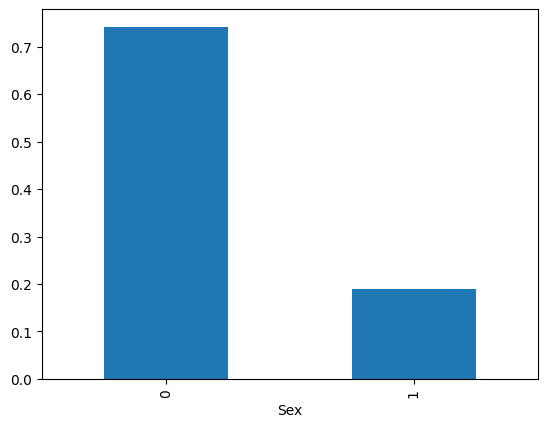

In [51]:
df_train.groupby('Sex').Survived.mean().plot(kind='bar')

<AxesSubplot: xlabel='Pclass'>

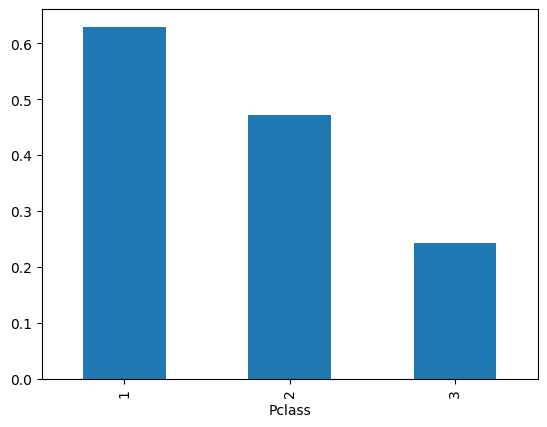

In [52]:
df_train.groupby('Pclass').Survived.mean().plot(kind='bar')

<AxesSubplot: xlabel='Pclass'>

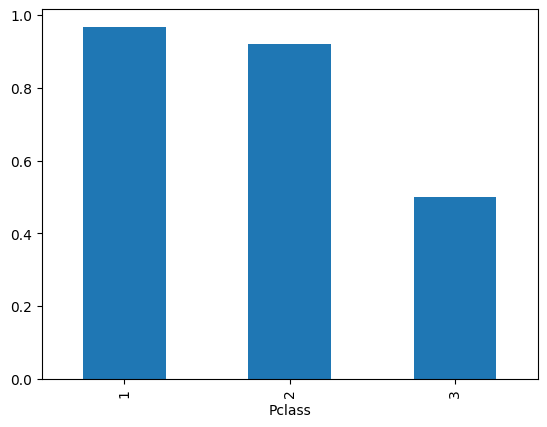

In [35]:
df_train.query('Sex == 0').groupby('Pclass').Survived.mean().plot(kind='bar')

<AxesSubplot: xlabel='CabinClass'>

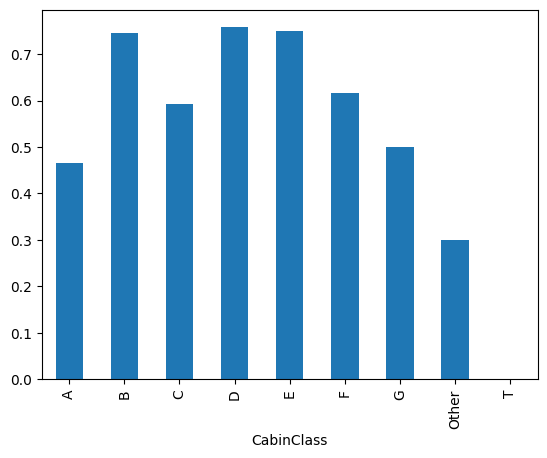

In [73]:
df_train.groupby('CabinClass').Survived.mean().plot(kind='bar')

In [30]:
# Taking only the features that is important for now
X = df_train[['Sex', 'Pclass']]

# Taking the labels (Survived or Not Survived)
Y = df_train['Survived']

# Spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [32]:
# Declaring the SVC with no tunning
classifier2 = SVC()

# Fitting the data. This is where the SVM will learn
classifier2.fit(X_train, Y_train)

# Predicting the result and giving the accuracy
score2 = classifier2.score(x_test, y_test)

print(score2)

0.7877094972067039


# Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
import seaborn as sns

In [80]:
df_train

,Age,Cabin,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,C,OtherPort,Q,S,CabinClass,CabinEncoded
0,22.0,NaN,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0,A/5 21171,0.0,0.0,0.0,1.0,Other,7
1,38.0,C85,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1,PC 17599,1.0,0.0,0.0,0.0,C,2
2,26.0,NaN,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1,STON/O2. 3101282,0.0,0.0,0.0,1.0,Other,7
3,35.0,C123,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1,113803,0.0,0.0,0.0,1.0,C,2
4,35.0,NaN,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0,373450,0.0,0.0,0.0,1.0,Other,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,NaN,13.0000,"Montvila, Rev. Juozas",0,887,2,1,0,0,211536,0.0,0.0,0.0,1.0,Other,7
887,19.0,B42,30.0000,"Graham, Miss. Margaret Edith",0,888,1,0,0,1,112053,0.0,0.0,0.0,1.0,B,1
888,24.0,NaN,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",2,889,3,0,1,0,W./C. 6607,0.0,0.0,0.0,1.0,Other,7
889,26.0,C148,30.0000,"Behr, Mr. Karl Howell",0,890,1,1,0,1,111369,1.0,0.0,0.0,0.0,C,2


In [125]:
df_train_cut = df_train.drop(['Cabin','Name','Ticket','PassengerId','Cabin','CabinClass','OtherPort'],axis=1)

In [126]:
df_train_cut

,Age,Fare,Parch,Pclass,Sex,SibSp,Survived,C,Q,S,CabinEncoded
0,22.0,7.2500,0,3,1,1,0,0.0,0.0,1.0,7
1,38.0,71.2833,0,1,0,1,1,1.0,0.0,0.0,2
2,26.0,7.9250,0,3,0,0,1,0.0,0.0,1.0,7
3,35.0,53.1000,0,1,0,1,1,0.0,0.0,1.0,2
4,35.0,8.0500,0,3,1,0,0,0.0,0.0,1.0,7
...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,13.0000,0,2,1,0,0,0.0,0.0,1.0,7
887,19.0,30.0000,0,1,0,0,1,0.0,0.0,1.0,1
888,24.0,23.4500,2,3,0,1,0,0.0,0.0,1.0,7
889,26.0,30.0000,0,1,1,0,1,1.0,0.0,0.0,2


In [127]:
# Taking only the features that is important for now
X = df_train_cut.drop(['Survived'],axis=1)

# Taking the labels (Survived or Not Survived)
Y = df_train_cut['Survived']

# Spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [128]:
clf = RandomForestClassifier(criterion='entropy', 
                             n_estimators=500,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)

In [129]:
clf.fit(X_train,  np.ravel(Y_train))

RandomForestClassifier(criterion='entropy', min_samples_split=10,
                       n_estimators=500, n_jobs=-1, oob_score=True,
                       random_state=1)

In [130]:
print("RF Accuracy: " + repr(round(clf.score(x_test, y_test) * 100, 2)) + "%")

RF Accuracy: 84.36%


In [131]:
result_rf = cross_val_score(clf, X_train, Y_train, cv=10, scoring='accuracy')

In [132]:
print('The cross validated score for Random forest is:', round(result_rf.mean() * 100, 2), '%')

The cross validated score for Random forest is: 81.6 %


In [133]:
Y_pred = cross_val_predict(clf,X_train,Y_train,cv = 10)

In [134]:
from sklearn.metrics import confusion_matrix

Text(0.5, 1.05, 'Confusion_matrix for RF')

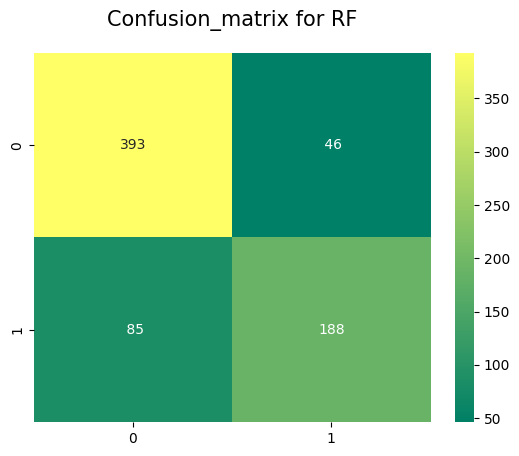

In [135]:
sns.heatmap(confusion_matrix(Y_train,Y_pred),annot = True,fmt = '3.0f',cmap = "summer")
plt.title('Confusion_matrix for RF', y = 1.05, size = 15)

In [136]:
feature_importances = clf.feature_importances_
feature_importances

array([0.20472224, 0.2209571 , 0.04079911, 0.08565458, 0.29089642,
       0.05018865, 0.01389284, 0.01351174, 0.0179891 , 0.06138824])

In [137]:
attributes = df_train_cut.columns
attributes

Index(['Age', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Survived', 'C', 'Q',
       'S', 'CabinEncoded'],
      dtype='object')

In [138]:
sorted(zip(feature_importances, attributes), reverse=True)

[(0.2908964176388001, 'Sex'),
 (0.22095709855440274, 'Fare'),
 (0.20472224123580068, 'Age'),
 (0.08565457962463854, 'Pclass'),
 (0.06138823515273819, 'S'),
 (0.05018864649536197, 'SibSp'),
 (0.040799109359394556, 'Parch'),
 (0.017989095519861654, 'Q'),
 (0.013892837458208502, 'Survived'),
 (0.013511738960793137, 'C')]

# Naive Bayes

In [140]:
from sklearn.naive_bayes import GaussianNB

In [165]:
# Taking only the features that is important for now
# X = df_train_cut[['Sex']]
X = df_train_cut.drop(['Survived'],axis=1)

# Taking the labels (Survived or Not Survived)
Y = df_train_cut[['Survived']]

# Spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [166]:
NB = GaussianNB()

In [167]:
NB.fit(X_train,  np.ravel(Y_train))

GaussianNB()

In [168]:
print("NB Accuracy: " + repr(round(NB.score(x_test, y_test) * 100, 2)) + "%")

NB Accuracy: 81.56%


In [169]:
result_rf=cross_val_score(NB,Y_train,Y_train,cv=10,scoring='accuracy')
print('The cross validated score for Random forest is:',round(result_rf.mean()*100,2))


The cross validated score for Random forest is: 100.0


C:\Users\Smelly_Giraffe\.conda\envs\DataWorksEnv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Smelly_Giraffe\.conda\envs\DataWorksEnv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Smelly_Giraffe\.conda\envs\DataWorksEnv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Smelly_Giraffe\.conda\envs\DataWorksEnv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A colu

In [170]:
Y_pred = cross_val_predict(NB,X_train,Y_train,cv=10)

C:\Users\Smelly_Giraffe\.conda\envs\DataWorksEnv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Smelly_Giraffe\.conda\envs\DataWorksEnv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Smelly_Giraffe\.conda\envs\DataWorksEnv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Smelly_Giraffe\.conda\envs\DataWorksEnv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A colu

Text(0.5, 1.05, 'Confusion_matrix for NB')

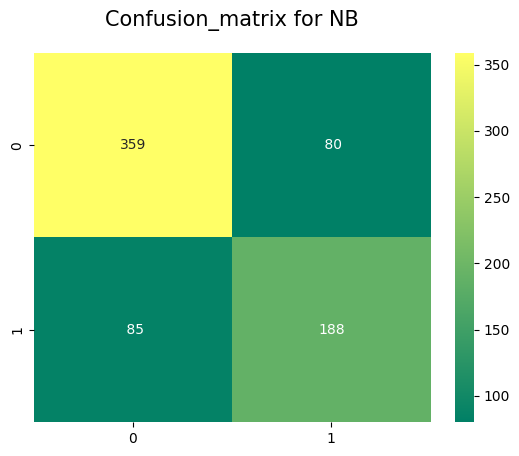

In [171]:
sns.heatmap(confusion_matrix(Y_train,Y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix for NB', y=1.05, size=15)

In [ ]:
ju